In [1]:
import tensorflow as tf
import segmentation_models as sm
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
import keras 

#from keras.utils import normalize
from tensorflow.keras.utils import normalize
from keras.metrics import MeanIoU

Segmentation Models: using `keras` framework.


In [2]:
#Resizing images, if needed
SIZE_X = 128 
SIZE_Y = 128
n_classes=2 #Number of classes for segmentation

#Capture training image info as a list


In [3]:
train_images = []
#/home/fjannat/Documents/EarthVision/data/hillshade/dataset_1/train/masks
for directory_path in glob.glob("/home/fjannat/Documents/EarthVision/data/platforms2/train/images"):
    
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, 1)       
        #img = cv2.resize(img, (SIZE_Y, SIZE_X))
        train_images.append(img)
        
#Convert list to array for machine learning processing        
train_images = np.array(train_images)
train_images = np.array(train_images, dtype='float32')/255
print(train_images.shape)
#plt.imshow(train_images[0])

(1994, 128, 128, 3)


In [4]:
np.unique(train_images[0])

array([0.21568628, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313726, 0.24705882, 0.2509804 ,
       0.25490198, 0.25882354, 0.2627451 , 0.26666668, 0.27058825,
       0.27450982, 0.2784314 , 0.28235295, 0.28627452, 0.2901961 ,
       0.29411766, 0.29803923, 0.3019608 , 0.30588236, 0.30980393,
       0.3137255 , 0.31764707, 0.32156864, 0.3254902 , 0.32941177,
       0.33333334, 0.3372549 , 0.34117648, 0.34509805, 0.34901962,
       0.3529412 , 0.35686275, 0.36078432, 0.3647059 , 0.36862746,
       0.37254903, 0.3764706 , 0.38039216, 0.38431373, 0.3882353 ,
       0.39215687, 0.39607844, 0.4       , 0.40392157, 0.40784314,
       0.4117647 , 0.41568628, 0.41960785, 0.42352942, 0.42745098,
       0.43137255, 0.43529412, 0.4392157 , 0.44313726, 0.44705883,
       0.4509804 , 0.45490196, 0.45882353, 0.4627451 , 0.46666667,
       0.47058824, 0.4745098 , 0.47843137, 0.48235294, 0.4862745 ,
       0.49019608, 0.49411765, 0.49803922, 0.5019608 , 0.50588

(1994, 128, 128)


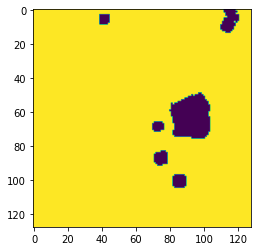

In [5]:
#Capture mask/label info as a list
train_masks = [] 
for directory_path in glob.glob("/home/fjannat/Documents/EarthVision/data/platforms2/train/masks"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)       
        #mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)  #Otherwise ground truth changes due to interpolation
        train_masks.append(mask)
        
#Convert list to array for machine learning processing          
train_masks = np.array(train_masks)
train_masks = np.array(train_masks, dtype='float32')
#train_masks = np.expand_dims(train_masks, axis=3)
print(train_masks.shape)

plt.imshow(train_masks[0])


(843, 128, 128, 3)
(843, 128, 128)


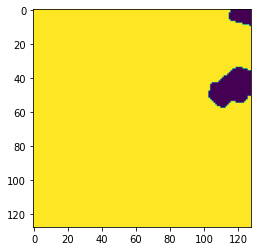

In [6]:
val_images = []
for directory_path in glob.glob("/home/fjannat/Documents/EarthVision/data/platforms2/val/images"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, 1)       
        #img = cv2.resize(img, (SIZE_Y, SIZE_X))
        val_images.append(img)
        
#Convert list to array for machine learning processing        
val_images = np.array(val_images)
val_images = np.array(val_images, dtype='float32')/255
print(val_images.shape)
#plt.imshow(val_images[0])



#Capture mask/label info as a list
val_masks = [] 
for directory_path in glob.glob("/home/fjannat/Documents/EarthVision/data/platforms2/val/masks"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)       
        #mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)  #Otherwise ground truth changes due to interpolation
        val_masks.append(mask)
        
#Convert list to array for machine learning processing          
val_masks = np.array(val_masks)
val_masks = np.array(val_masks, dtype='float32')
#val_masks = np.expand_dims(val_masks, axis=3)
print(val_masks.shape)
plt.imshow(val_masks[0])


In [8]:
np.unique(val_images[0])

array([0.2       , 0.22745098, 0.23529412, 0.24705882, 0.2509804 ,
       0.25882354, 0.2627451 , 0.26666668, 0.27058825, 0.27450982,
       0.2784314 , 0.28235295, 0.28627452, 0.2901961 , 0.29411766,
       0.29803923, 0.3019608 , 0.30588236, 0.30980393, 0.3137255 ,
       0.31764707, 0.32156864, 0.3254902 , 0.32941177, 0.33333334,
       0.3372549 , 0.34117648, 0.34509805, 0.34901962, 0.3529412 ,
       0.35686275, 0.36078432, 0.3647059 , 0.36862746, 0.37254903,
       0.3764706 , 0.38039216, 0.38431373, 0.3882353 , 0.39215687,
       0.39607844, 0.4       , 0.40392157, 0.40784314, 0.4117647 ,
       0.41568628, 0.41960785, 0.42352942, 0.42745098, 0.43137255,
       0.43529412, 0.4392157 , 0.44313726, 0.44705883, 0.4509804 ,
       0.45490196, 0.45882353, 0.4627451 , 0.46666667, 0.47058824,
       0.4745098 , 0.47843137, 0.48235294, 0.4862745 , 0.49019608,
       0.49411765, 0.49803922, 0.5019608 , 0.5058824 , 0.50980395,
       0.5137255 , 0.5176471 , 0.52156866, 0.5254902 , 0.52941

In [9]:
###############################################
#Encode labels... but multi dim array so need to flatten, encode and reshape
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = train_masks.shape
train_masks_reshaped = train_masks.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)

np.unique(train_masks_encoded_original_shape)

/home/fjannat/anaconda3/envs/env_ev/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 1])

In [10]:
n, h, w = val_masks.shape
val_masks_reshaped = val_masks.reshape(-1,1)
val_masks_reshaped_encoded = labelencoder.fit_transform(val_masks_reshaped)
val_masks_encoded_original_shape = val_masks_reshaped_encoded.reshape(n, h, w)
np.unique(val_masks_encoded_original_shape)

array([0, 1])

In [11]:
train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis=3)
val_masks_input = np.expand_dims(val_masks_encoded_original_shape, axis=3)
train_masks_input.shape

(1994, 128, 128, 1)

In [12]:
X_train = train_images
X_val = val_images

y_train = train_masks_input
y_val = val_masks_input
print("Class values in the dataset are ... ", np.unique(y_train))  # 0 is the background/few unlabeled 

Class values in the dataset are ...  [0 1]


In [13]:
from tensorflow.keras.utils import to_categorical
train_masks_cat = to_categorical(y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))



val_masks_cat = to_categorical(y_val, num_classes=n_classes)
y_val_cat = val_masks_cat.reshape((y_val.shape[0], y_val.shape[1], y_val.shape[2], n_classes))


In [14]:
n_classes=2
activation='softmax' #softmax/sigmoid

LR = 0.0001
optim = tf.keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
# set class weights for dice_loss (car: 1.; pedestrian: 2.; background: 0.5;)
#dice_loss = sm.losses.DiceLoss(class_weights=np.array([0.25, 0.25, 0.25, 0.25])) 
dice_loss = sm.losses.DiceLoss(class_weights=np.array([.5,.5])) 

focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]


In [15]:
########################################################################
###Model 1
import segmentation_models as sm

sm.set_framework('tf.keras')

sm.framework()

BACKBONE1 = 'resnet34'#resnet34, inceptionv3, vgg16
preprocess_input1 = sm.get_preprocessing(BACKBONE1)

# preprocess input
X_train1 = preprocess_input1(X_train)
X_val1 = preprocess_input1(X_val)

#define model

model1 = sm.Unet(BACKBONE1, encoder_weights='imagenet', classes=n_classes, activation=activation)

# compile keras model with defined optimozer, loss and metrics
model1.compile(optim, loss='categorical_crossentropy', metrics=metrics)

#model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

print(model1.summary())


history1=model1.fit(X_train1, 
          y_train_cat,
          batch_size=8, 
          epochs=50,
          verbose=1,
          shuffle=True,
          validation_data=(X_val1, y_val_cat))


#model1.save('resnet_backbone_200epochs.hdf5')

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, None, None,  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 3 9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 9408        zero_padding2d[0][0]             
____________________________________________________________________________________________

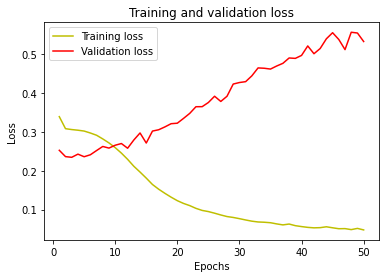

In [16]:
##########################################################

###
#plot the training and validation accuracy and loss at each epoch
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

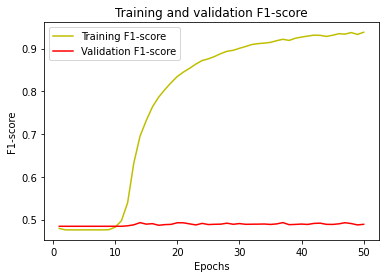

In [18]:
acc = history1.history['f1-score']
val_acc = history1.history['val_f1-score']

plt.plot(epochs, acc, 'y', label='Training F1-score ')
plt.plot(epochs, val_acc, 'r', label='Validation F1-score')
plt.title('Training and validation F1-score')
plt.xlabel('Epochs')
plt.ylabel('F1-score')
plt.legend()
plt.show()


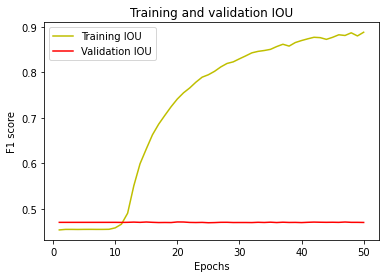

In [19]:
acc = history1.history['iou_score']
val_acc = history1.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('F1 score')
plt.legend()
plt.show()


In [20]:
#####################################################

from keras.models import load_model

### FOR NOW LET US FOCUS ON A SINGLE MODEL

#Set compile=False as we are not loading it for training, only for prediction.
#model1 = load_model('resnet_backbone_200epochs.hdf5', compile=False)

#IOU
y_pred1=model1.predict(X_val)
y_pred1_argmax=np.argmax(y_pred1, axis=3)


#Using built in keras function
#from keras.metrics import MeanIoU
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes) 
print(IOU_keras)
IOU_keras.update_state(y_val[:,:,:,0], y_pred1_argmax)
print("Mean IoU =", IOU_keras.result().numpy())
# from sklearn.metrics import f1_score
# f1_sklearn = f1_score(y_val[:,:,:,0].flatten(), y_pred1_argmax.flatten(), average=None)
# print(f1_sklearn)
#To calculate I0U for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)
# class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[1,0])
# class2_IoU = values[1,1]/(values[1,1] + values[1,0])

# print("IoU for class1 is: ", class1_IoU)
# print("IoU for class2 is: ", class2_IoU)

# #Vaerify the prediction on first image
# plt.imshow(train_images[0, :,:,0], cmap='gray')
# plt.imshow(train_masks[0], cmap='gray')
##############################################################


Mean IoU = 0.4697207
[[6.1190000e+03 8.2376900e+05]
 [1.0284700e+05 1.2878977e+07]]


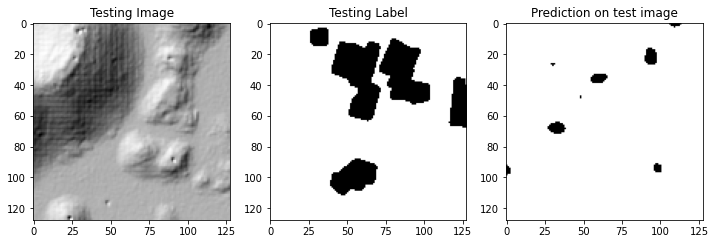

In [28]:
#Test some random images
import random
test_img_number = random.randint(0, len(X_val))
test_img = X_val[test_img_number]
ground_truth=y_val[test_img_number]
test_img_input=np.expand_dims(test_img, 0)

test_img_input1 = preprocess_input1(test_img_input)

test_pred1 = model1.predict(test_img_input1)
test_prediction1 = np.argmax(test_pred1, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction1, cmap='gray')
plt.show()

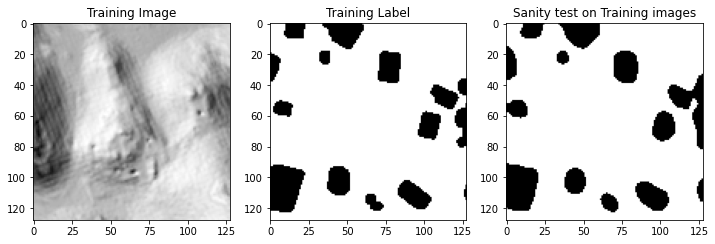

In [30]:
#Test some random images
import random
test_img_number = random.randint(0, len(X_train))
test_img = X_train[test_img_number]
ground_truth=y_train[test_img_number]
test_img_input=np.expand_dims(test_img, 0)

test_img_input1 = preprocess_input1(test_img_input)

test_pred1 = model1.predict(test_img_input1)
test_prediction1 = np.argmax(test_pred1, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Training Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Training Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Sanity test on Training images')
plt.imshow(test_prediction1, cmap='gray')
plt.show()